# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [182]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()
number_mice

249

In [183]:
type(combined_data)

pandas.core.frame.DataFrame

In [184]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
dupe_mouse_id

array(['g989'], dtype=object)

In [185]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = combined_data.loc[combined_data["Mouse ID"].isin(dupe_mouse_id)]
dupe_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [186]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data['Mouse ID'].isin(dupe_mouse_id)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [187]:
type(clean_data)

pandas.core.frame.DataFrame

In [188]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = clean_data["Mouse ID"].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [189]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_aggregation =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [190]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
standard_deviation = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
standard_erorr = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                             "Median Tumor Volume":median, 
                             "Tumor Volume Variance":variance, 
                             "Tumor Volume Std. Dev.":standard_deviation, 
                             "Tumor Volume Std. Err.":standard_erorr
                            })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

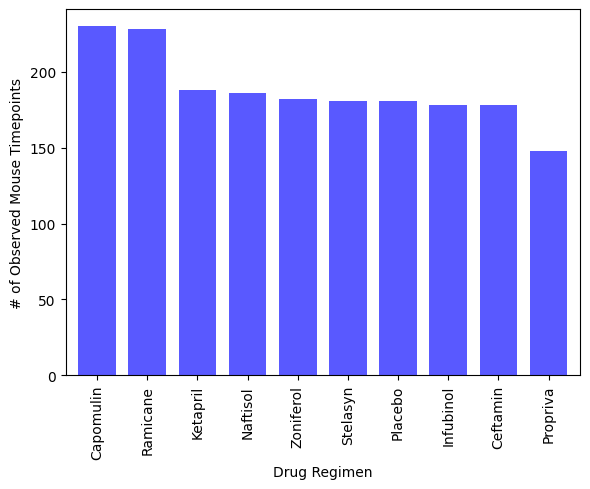

In [191]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(6, 5), color='b', alpha= 0.65, width=.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

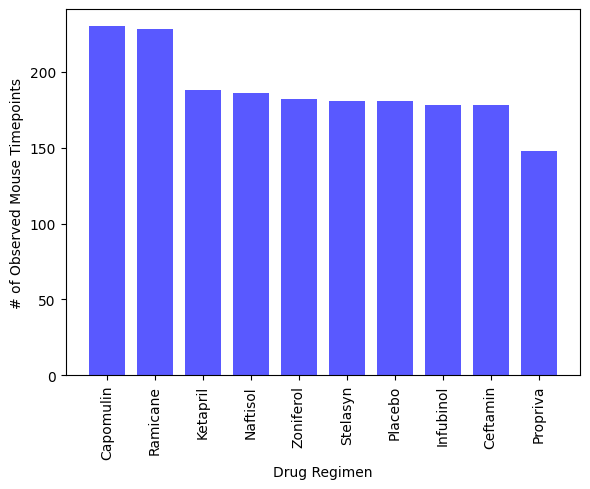

In [192]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimens = regimen_counts.index
number_observed = regimen_counts.values

plt.figure(figsize=(6, 5))
plt.bar(drug_regimens, number_observed, color='b', alpha= 0.65, width=.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

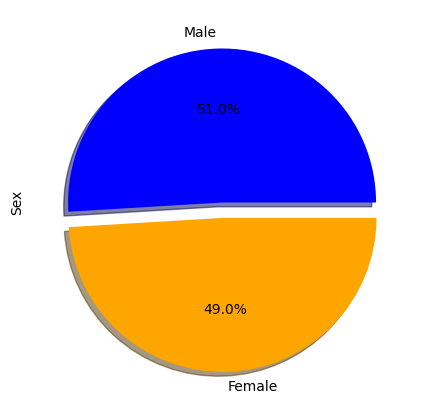

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data['Sex'].value_counts()
explode = (0 , 0.1)
plt.figure(figsize=(5, 5))
gender.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'],shadow=True, explode = explode)

plt.ylabel('Sex') 
plt.show()

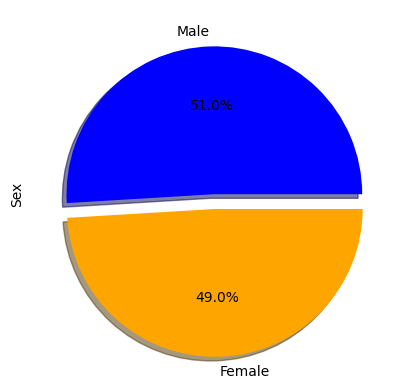

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=['blue', 'orange'],shadow=True, explode = explode)

plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [195]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

gp_greatest_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_tumor_volume = pd.merge(gp_greatest_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

#print(merged_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

In [196]:
# Put treatments into a list for for loop (and later for plot labels)
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_results = [ ]

for treatment in selected_treatments:
    treatment_data = merged_tumor_volume.loc[merged_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles =treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
# Identify potential outliers for the current treatment

    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    result_string = f"{treatment}'s potential outliers: {potential_outliers.to_string(index=False)}"
    treatment_results.append(result_string)

    
for result in treatment_results:
    print(result)

Capomulin's potential outliers: Series([], )
Ramicane's potential outliers: Series([], )
Infubinol's potential outliers: 36.321346
Ceftamin's potential outliers: Series([], )


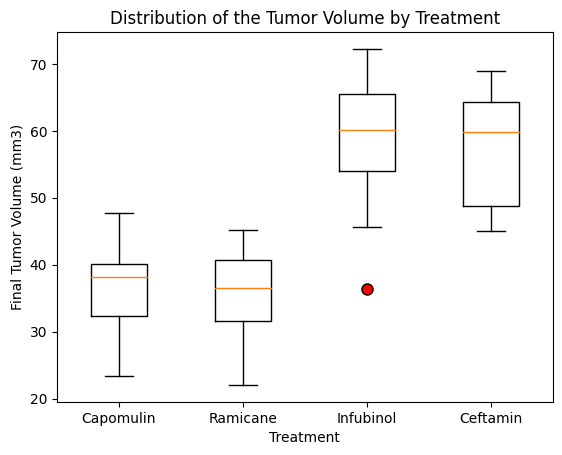

In [220]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
grouped_data = [merged_tumor_volume.loc[merged_tumor_volume['Drug Regimen'] == treatment,
                                        'Tumor Volume (mm3)'] for treatment in selected_treatments]

box_plot = ax.boxplot(grouped_data, labels=selected_treatments, flierprops={'marker': 'o', 'markerfacecolor': 
                                                                            'red', 'markersize': 8})
plt.title('Distribution of the Tumor Volume by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

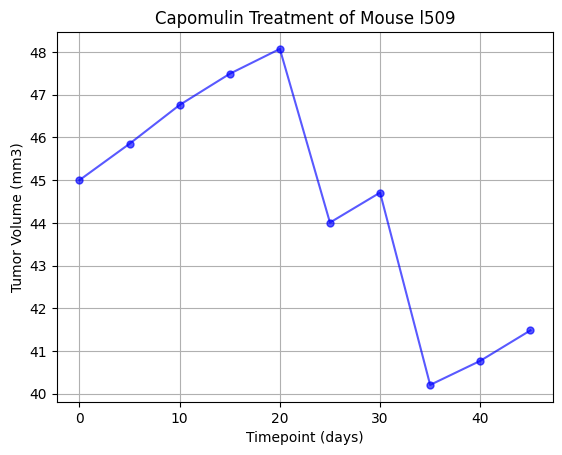

In [218]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = "l509"

capomulin_data_id = clean_data[(clean_data["Drug Regimen"] == "Capomulin") 
                            & (clean_data["Mouse ID"] == selected_mouse_id)]

plt.plot(capomulin_data_id["Timepoint"], capomulin_data_id["Tumor Volume (mm3)"], marker='o', 
                            color='b',alpha= 0.65, markersize=5)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {selected_mouse_id}")

plt.grid(True)
plt.show()

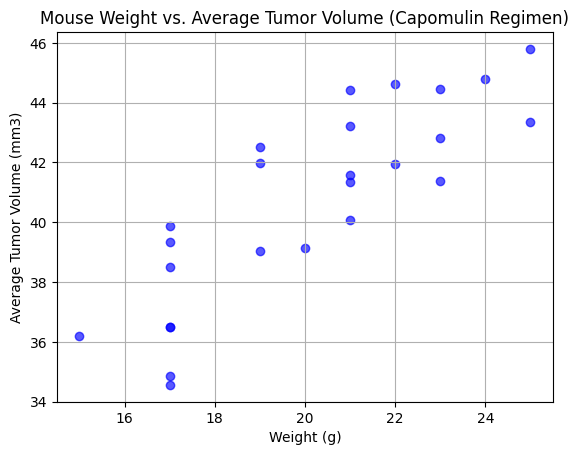

In [219]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='b',alpha= 0.65)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


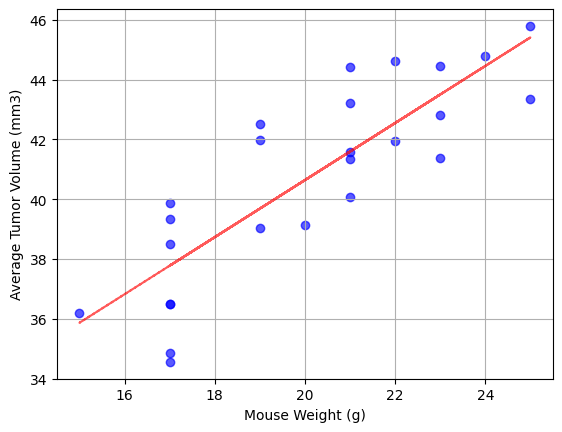

In [233]:
# Calculate the correlation coefficient and a linear regression model  
correlation_coefficient = st.pearsonr(weight, average_tumor_volume)[0]

# Create a linear regression equation
regression_line = f"y = {slope:.2f}x + {intercept:.2f}"

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

plt.scatter(weight, average_tumor_volume, marker='o', color='b',alpha= 0.65)
plt.plot(weight, slope * weight + intercept, color='r',alpha= 0.65, linestyle='--' )

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.grid(True)
plt.show()